In [ ]:
!git clone https://github.com/neuroailab/lr-identify
%cd lr-identify

Cloning into 'lr-identify'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 35 (delta 2), reused 32 (delta 2), pack-reused 0
Unpacking objects: 100% (35/35), done.
/content/lr-identify


In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
!bash get_dataset.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  511M  100  511M    0     0  88.9M      0  0:00:05  0:00:05 --:--:-- 95.3M


In [ ]:
data = pickle.load(open('dataset.pkl', 'rb'), encoding='latin1')

In [ ]:
data.keys()

dict_keys(['Y', 'X', 'X_cat', 'meta', 'obs_keys'])

In [ ]:
data['X'].shape

(20736, 21, 45)

In [ ]:
data['X_cat'].shape

(20736, 21, 3)

In [ ]:
data['Y'].shape

(20736,)

In [ ]:
np.unique(data['Y'])

array(['adam', 'feedback', 'information', 'sgdm'], dtype='<U11')

In [ ]:
data['obs_keys']

array(['weightabs_kurtosis', 'weightabs_mean', 'weightabs_median',
       'weightabs_norm', 'weightabs_skew', 'weightabs_thirdquartile',
       'weightabs_var', 'weightraw_kurtosis', 'weightraw_mean',
       'weightraw_median', 'weightraw_norm', 'weightraw_skew',
       'weightraw_thirdquartile', 'weightraw_var', 'weightsq_kurtosis',
       'weightsq_mean', 'weightsq_median', 'weightsq_norm',
       'weightsq_skew', 'weightsq_thirdquartile', 'weightsq_var',
       'actabs_kurtosis', 'actabs_mean', 'actabs_median', 'actabs_norm',
       'actabs_skew', 'actabs_thirdquartile', 'actabs_var',
       'actraw_kurtosis', 'actraw_mean', 'actraw_median', 'actraw_norm',
       'actraw_skew', 'actraw_thirdquartile', 'actraw_var',
       'actsq_kurtosis', 'actsq_mean', 'actsq_median', 'actsq_norm',
       'actsq_skew', 'actsq_thirdquartile', 'actsq_var', 'gradavgabs_id',
       'gradavgraw_id', 'gradavgsq_id'], dtype='<U23')

In [ ]:
data['meta']

rec.array([('imagenet', 0, 'adam', None, 21, 0, 'resnet18', 256, 'block_group1_0/conv2'),
           ('imagenet', 0, 'adam', None, 21, 0, 'resnet18', 256, 'block_group1_0/conv0'),
           ('imagenet', 0, 'adam', None, 21, 0, 'resnet18', 256, 'block_group1_0/conv1'),
           ...,
           ('audionet', 0, 'information', None, 21, None, 'alexnet', 512, 'conv1'),
           ('audionet', 0, 'information', None, 21, None, 'alexnet', 512, 'conv5'),
           ('audionet', 0, 'information', None, 21, None, 'alexnet', 512, 'conv4')],
          dtype=[('task', '<U8'), ('start_idxs', '<i8'), ('learning_rule', '<U11'), ('dataset_seed', 'O'), ('end_idxs', '<i8'), ('model_seed', 'O'), ('architecture', '<U10'), ('batch_size', '<i8'), ('layer_name', '<U21')])

In [ ]:
print('Architectures: {} \n'.format(np.unique(data['meta']['architecture'])))
print('Tasks: {}'.format(np.unique(data['meta']['task'])))

Architectures: ['alexnet' 'alexnetlrn' 'knet' 'knetc4' 'knetc4lrn' 'knetlrn' 'resnet18'
 'resnet18v2' 'resnet34' 'resnet34v2'] 

Tasks: ['audionet' 'cifar10' 'imagenet' 'simclr']


In [ ]:
from cross_validation import get_possible_inds

def filter_inds(learning_rule,
              architectures=['resnet18'],
              tasks=['imagenet'],
              dataset_seeds=[None],
              model_seeds=[None],
              batch_sizes=[256],
              layer_names=['conv0']):
  
  '''Helper function to subselect the data by, defaults to the first layer of 
  ResNet18 trained on ImageNet with a batch size of 256 
  and non-deterministic dataset randomization seed and model seed.'''

  if not isinstance(architectures, list):
      architectures = [architectures]
  if not isinstance(tasks, list):
      tasks = [tasks]
  if not isinstance(dataset_seeds, list):
      dataset_seeds = [dataset_seeds]
  if not isinstance(model_seeds, list):
      model_seeds = [model_seeds]
  if not isinstance(batch_sizes, list):
      batch_sizes = [batch_sizes]
  if not isinstance(layer_names, list):
      layer_names = [layer_names]

  filter = lambda x: (x['learning_rule'] == learning_rule) \
                   and (x['architecture'] in architectures) \
                   and (x['task'] in tasks) \
                   and (x['dataset_seed'] in dataset_seeds) \
                   and (x['model_seed'] in model_seeds) \
                   and (x['batch_size'] in batch_sizes) \
                   and (x['layer_name'] in layer_names)

  inds = get_possible_inds(metadata=data['meta'], filter=filter)
  return np.squeeze(inds)

In [ ]:
!bash get_saved_results.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 82.6M  100 82.6M    0     0  67.4M      0  0:00:01  0:00:01 --:--:-- 67.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29574  100 29574    0     0   131k      0 --:--:-- --:--:-- --:--:--  131k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 34261  100 34261    0     0   150k      0 --:--:-- --:--:-- --:--:--  150k


In [ ]:
randomforest_results = pickle.load(open('saved_classifier_results/randomforest_allobs_results.pkl', 'rb'), encoding='latin1')

In [ ]:
randomforest_results['test']['mean_accuracy']

0.9966049382716049

In [ ]:
# this will yield the same as the 'mean_accuray' above
np.mean(randomforest_results['test']['accuracy_by_split'])

0.9966049382716049

In [ ]:
randomforest_results['cv_params']

[{'cls__max_features': 'sqrt', 'cls__n_estimators': 1000},
 {'cls__max_features': 'log2', 'cls__n_estimators': 1000},
 {'cls__max_features': 'sqrt', 'cls__n_estimators': 1000},
 {'cls__max_features': 'sqrt', 'cls__n_estimators': 100},
 {'cls__max_features': 'log2', 'cls__n_estimators': 1000},
 {'cls__max_features': 'log2', 'cls__n_estimators': 1000},
 {'cls__max_features': 'sqrt', 'cls__n_estimators': 500},
 {'cls__max_features': 'log2', 'cls__n_estimators': 1000},
 {'cls__max_features': 'sqrt', 'cls__n_estimators': 100},
 {'cls__max_features': 'log2', 'cls__n_estimators': 100}]

In [ ]:
randomforest_results['test'].keys()

dict_keys(['mean_dprime', 'confusion_matrices', 'labels', 'mean_balanced_accuracy', 'mean_accuracy', 'dprime_by_split', 'balanced_acc_by_split', 'accuracy_by_split'])

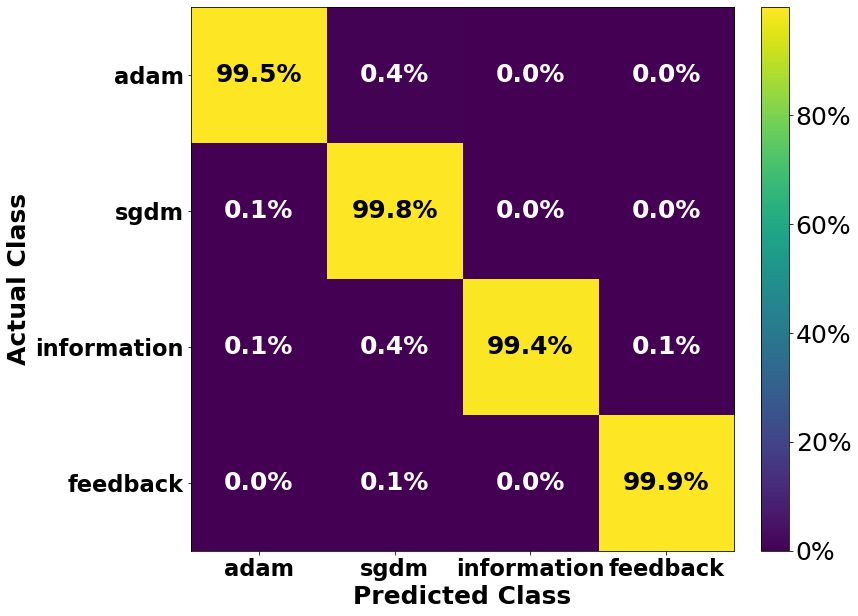

In [ ]:
# average across train/test splits
meansp_confmat = np.mean(np.stack(randomforest_results['test']['confusion_matrices'], axis=0), axis=0)
# normalize rows of confusion matrix
meansp_confmat = meansp_confmat.astype(float) / meansp_confmat.sum(1)
# get class labels
class_labels = randomforest_results['test']['labels']

# now do the actual plotting
fig, axes = plt.subplots(1, 1, figsize=(12.5, 10))
ax = plt.subplot(1, 1, 1)
im = ax.imshow(meansp_confmat, cmap=plt.get_cmap('viridis'))
# label ticks with class labels
ax.set_xticks(np.arange(len(list(class_labels))))
ax.set_yticks(np.arange(len(list(class_labels))))
ax.set_xticklabels(class_labels, 
                   fontsize=22.5, fontweight='bold')
ax.set_yticklabels(class_labels, 
                   fontsize=22.5, fontweight='bold')
# x and y labels
ax.set_xlabel('Predicted Class', fontsize=25, fontweight='bold')
ax.set_ylabel('Actual Class', fontsize=25, fontweight='bold')
# loop over data dimensions and create text annotations
for i in range(meansp_confmat.shape[0]):
    for j in range(meansp_confmat.shape[1]):
        text = ax.text(j, i, "{:.1f}%".format(meansp_confmat[i, j]*100),
                       ha="center", va="center", 
                       color="w" if i != j else "k", 
                       fontsize=25, fontweight='bold')
        
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax,
                    width="5%",  # width = 5% of parent_bbox width
                    height="100%",  # height : 50%
                    loc='lower left',
                    bbox_to_anchor=(1.05, 0., 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0,
                    )
cbar = fig.colorbar(im, cax=axins, ticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
cbar.ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
cbar.ax.tick_params(labelsize=25)
plt.show()